In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
plt.style.use('seaborn')

### Data Preparation

In [3]:
# i need 2 clusters
mean01 = np.array([1, 0.5])
cov01 = np.array([[1, 0.1], [0.1, 1.2]])

mean02 = np.array([4, 5])
cov02 = np.array([[1.2, 0.1], [0.1, 1.3]])
dist01 = np.random.multivariate_normal(mean01, cov01, 500)
dist02 = np.random.multivariate_normal(mean02, cov02, 500)
print(dist01.shape)

(500, 2)


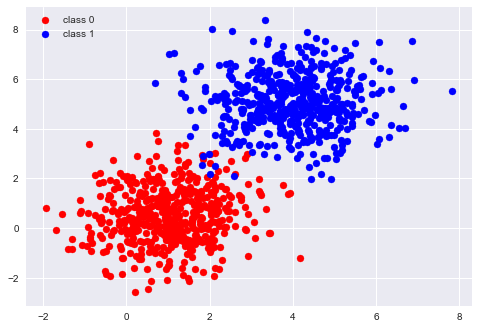

In [4]:
plt.scatter(dist01[:, 0], dist01[:, 1], color='red', label='class 0')
plt.scatter(dist02[:, 0], dist02[:, 1], color='blue', label='class 1')
plt.legend()
plt.show()

In [5]:
data = np.zeros((1000, 3))

In [6]:
# Combining the above generated data in a data matrix
data[:500, :2] = dist01
data[:500, 2] = 0.0
data[500:, :2] = dist02
data[500:, 2] = 1.0

In [7]:
# Randomly shuffling the data
np.random.shuffle(data)
print(data[:10])

[[-0.95405698 -0.72173616  0.        ]
 [ 1.40829996 -0.59609996  0.        ]
 [ 0.55781877 -0.73412498  0.        ]
 [ 5.24118434  4.31501112  1.        ]
 [ 1.50570158 -1.00301526  0.        ]
 [ 4.27381508  5.09108722  1.        ]
 [ 4.32106828  5.87988264  1.        ]
 [ 3.23710335  5.37236262  1.        ]
 [ 4.41156392  5.99490044  1.        ]
 [ 3.68701435  3.82801356  1.        ]]


In [8]:
# Divide the data in train and test
split = int(0.8*data.shape[0])
X_train = data[:split, :-1]
y_train = data[:split, -1]
X_test = data[split:, :-1]
y_test = data[split:, -1]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(800, 2) (800,) (200, 2) (200,)


### Normalize the data

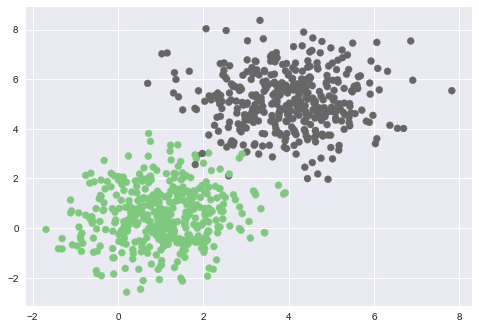

In [9]:
plt.close()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Accent)
plt.show()

In [10]:
x_mean = X_train.mean(axis=0)
x_std = X_train.std(axis=0)
X_train = (X_train-x_mean)/x_std

# we have to apply the same transformation to the test data also because it can have its own mean but we have to shift it corresponding to the training data only
X_test = (X_test-x_mean)/x_std

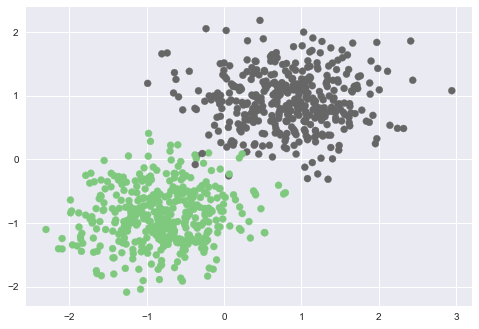

In [11]:
plt.close()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Accent)
plt.show()

In [12]:
X_train.mean(axis=0)
X_train.std(axis=0)

array([1., 1.])

### Logistic Regression

In [13]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

In [14]:
# X - entire array (m x (n+1))
# theta - np array ((n+1) x 1)
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

In [15]:
# X - array (m x (n+1))
# y - array (m x 1)
# theta - np array ((n+1) x 1)
def error(X, y, theta):
    hi = hypothesis(X, theta)
    err = -1*np.mean((y*np.log(hi)) + ((1-y)*np.log(1-hi)))
    return err

In [16]:
def gradient(X, y, theta):
    hi = hypothesis(X, theta)
    grad = -np.dot(X.T, (y-hi))
    return grad/X.shape[0]

In [17]:
def gradientDescent(X, y, learning_rate=0.1, maxItr=500):
    n = X.shape[1]
    theta = np.zeros((n, 1))
    errorList = []
    for i in range(maxItr):
        err = error(X, y, theta)
        errorList.append(err)
        grad = gradient(X, y, theta)
        theta = theta - learning_rate*grad
    return theta, errorList

In [18]:
ones = np.ones((X_train.shape[0], 1))
X_train_final = np.hstack((ones, X_train))
y_train = y_train.reshape((-1,1))

In [19]:
theta, errorList = gradientDescent(X_train_final, y_train, learning_rate=0.5)

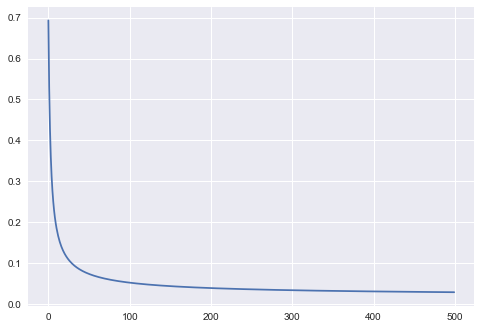

In [20]:
plt.plot(errorList)

In [21]:
theta

array([[-0.14426264],
       [ 2.99557907],
       [ 4.74200415]])

### Visualize the decision surface

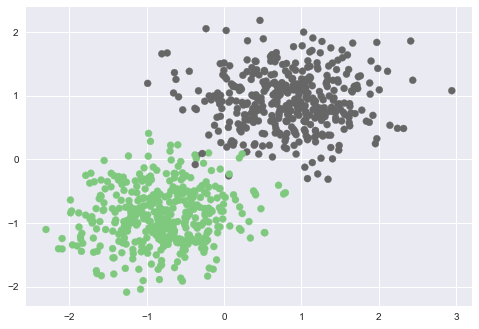

In [22]:
plt.close()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.reshape((-1,)), cmap=plt.cm.Accent)
plt.show()

Plotting the line using the formulta theta0 + x1*theta1 + x2*theta2 = 0

In [23]:
x1 = np.arange(-3, 4)
x2 = -(theta[0] + theta[1]*x1)/theta[2]

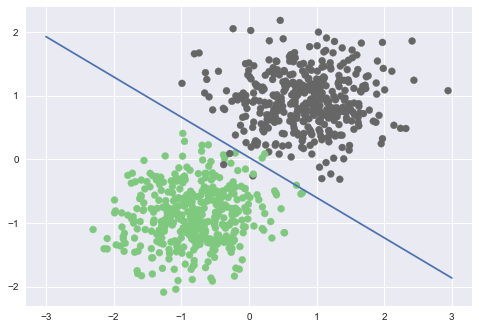

In [24]:
plt.close()
plt.plot(x1, x2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.reshape((-1,)), cmap=plt.cm.Accent)
plt.show()

### Prediction and Accuracy

In [25]:
def predict(X, theta):
    # hi stores the confidence score
    hi = hypothesis(X, theta)
    output = np.zeros(hi.shape)
    output[hi>=0.5] = 1
    output = output.astype('int')
    return output

In [26]:
ones = np.ones((X_test.shape[0], 1))
X_test_final = np.hstack((ones, X_test))

In [27]:
X_train_pred = predict(X_train_final, theta)
X_test_pred = predict(X_test_final, theta)

In [28]:
y_test = y_test.reshape((-1,1))

In [29]:
def accuracy(actual, pred):
    actual = actual.astype('int')
    acc = np.sum(actual==pred)/actual.shape[0]
    return acc*100

In [30]:
trainAccuracy = accuracy(y_train, X_train_pred)
testAccuracy = accuracy(y_test, X_test_pred)

In [31]:
print(trainAccuracy, testAccuracy)

99.125 98.5


### Sklearn for logistic regression model

In [32]:
model = LogisticRegression()

In [36]:
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [37]:
theta_0 = model.intercept_
theta_s = model.coef_

In [38]:
print(theta_0, theta_s)

[-0.15009515] [[2.72908894 4.5885976 ]]


In [39]:
model.score(X_train, y_train)

0.9925

In [40]:
model.score(X_test, y_test)

0.99

In [41]:
y_pred = model.predict(X_test)

In [42]:
y_pred.shape

(200,)